<a href="https://colab.research.google.com/github/mikiiiiiiiiiiiiiiiiiiii/Progetto_esame_reinforcement_learning/blob/main/Reinforcement_learing_for_stock_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement learning**
Il Reinforcement learning è una branca dell'intelligenza artificiale che si occupa della risoluzione di problemi in cui un agente intelligente deve prendere la migliore decisione possibile (ossia quella che gli porta più guadagno) sulla base di dati oggettivi che non dipendono dall'agente stesso (l'ambiente).\
**Key concepts**:


*   Agent
*   Environment
*   Policy 
*   Reward\
Nei metodi ***value-based*** ad stato corrisponde un valore, l'agente ha l'obiettivo di prendere l'azione che lo porterà nello stato con più valore.\
Nei metodi ***policy-based*** l'agente attribuisce una distribuzione di probabilità alle azioni disponibili, il suo obiettivo sarà quello di trovare la distribuzione di probabilità che massimizza il gudagno.



In questo notebook verranno presentati due algoritmi, uno per ciascun genere, che dovranno risolvere il complicato task di vendere, comprare o holdare un asset finanziario al fine di massimizzare il guadagno (molto banalmente espresso in termini monetari) e comparando la strategia trovata dall'algoritmo con quella del classico "buy and hold".
Il problema in esame può essere visivamente rappresentato da un Markov Decision Process in questo modo: 

I

# **Pseudo-code Q-NETWORK**


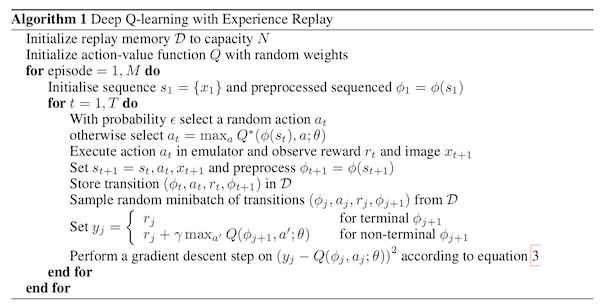

# **Pseudo-code Proximal Policy Optimization**


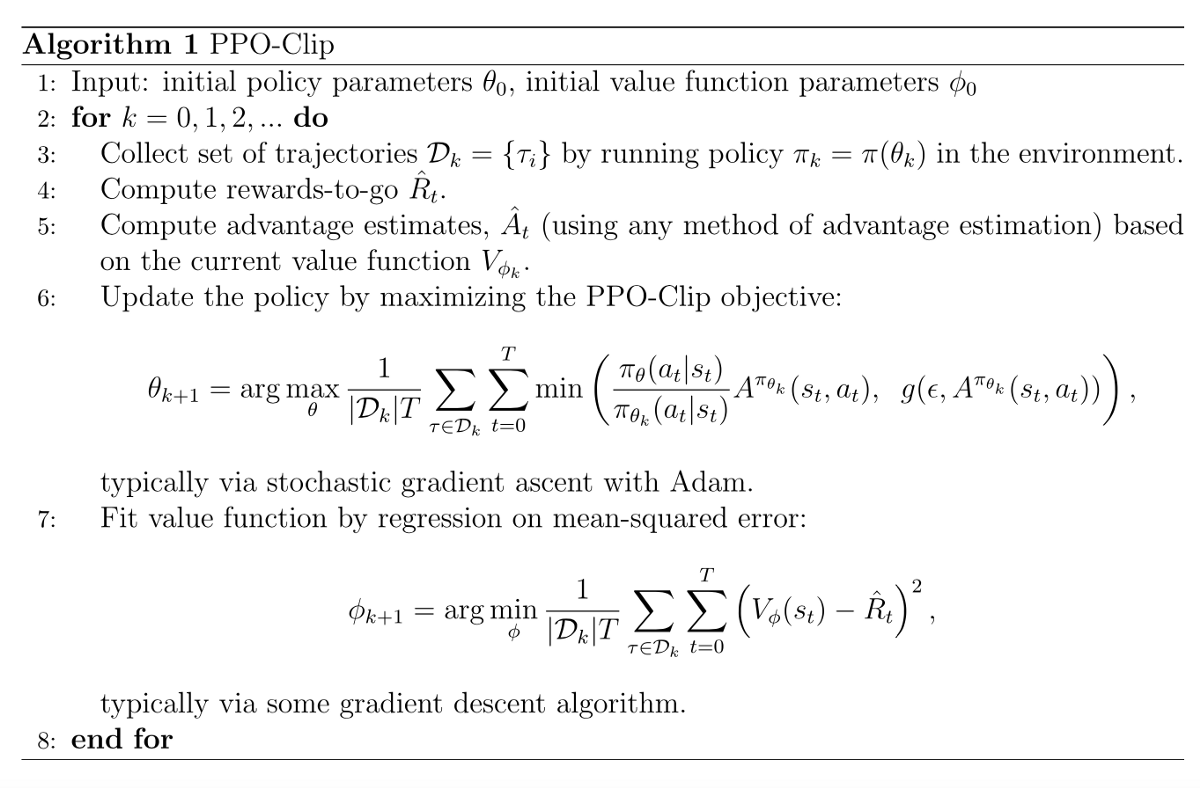

In [ ]:
# !pip install gym
# !pip install gym_anytrading
# !pip install quantstats
# !pip install stable-baselines
# !pip install stable-baselines[mpi]==2.10.0
!pip install stable-baselines3[extra]

In [ ]:
import stable_baselines3 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import gym
import gym_anytrading
import quantstats as qs

from stable_baselines3 import DQN,PPO
from stable_baselines3.common.vec_env import DummyVecEnv

import matplotlib.pyplot as plt

In [ ]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 10
start_index = window_size
end_index = len(df)

env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])

In [ ]:
policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
# model = DQN("MultiInputPolicy", env, verbose=1)
# model = DQN("MlpPolicy", env, verbose=1)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


AssertionError: ignored

In [ ]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 98.91061900000048, 'total_profit': 0.0002920478609639957, 'position': 1}


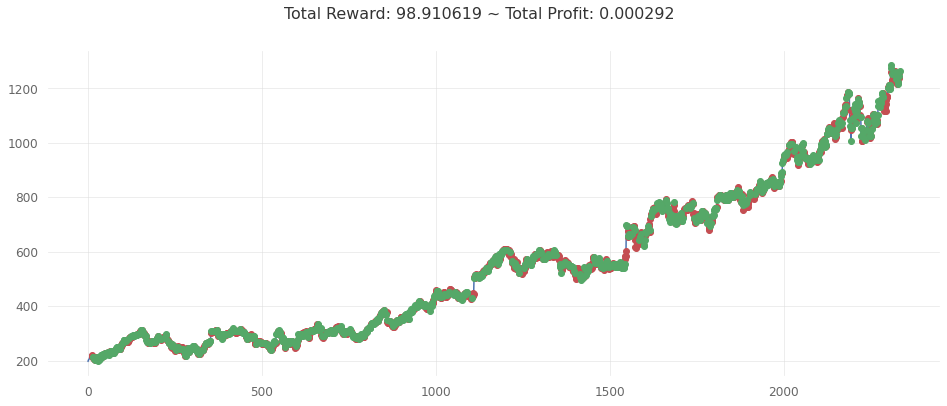

In [ ]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2009-06-10
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             24.0%

Cumulative Return          -99.97%
CAGR﹪                     -58.62%

Sharpe                     -4.73
Smart Sharpe               -4.33
Sortino                    -4.82
Smart Sortino              -4.41
Sortino/√2                 -3.41
Smart Sortino/√2           -3.12
Omega                      0.14

Max Drawdown               -99.97%
Longest DD Days            3362
Volatility (ann.)          18.27%
Calmar                     -0.59
Skew                       -2.34
Kurtosis                   15.12

Expected Daily %           -0.35%
Expected Monthly %         -7.07%
Expected Yearly %          -55.69%
Kelly Criterion            -105.62%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.24%
Expected Shortfall (cVaR)  -2.24%

Gain/Pain Ratio    

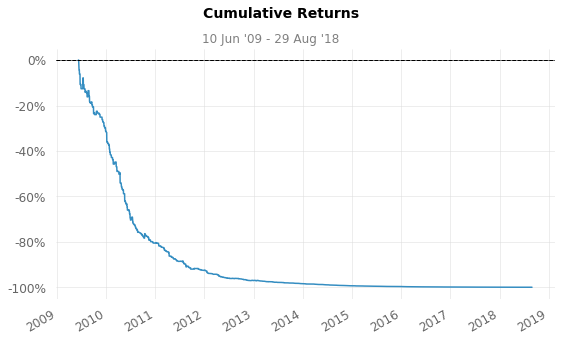

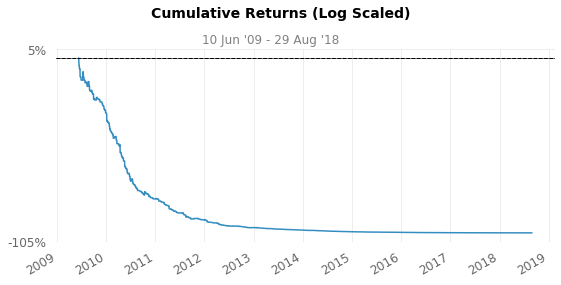

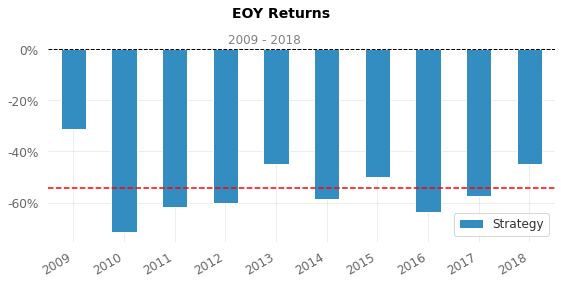

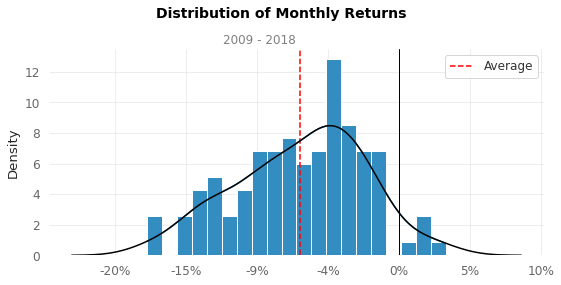

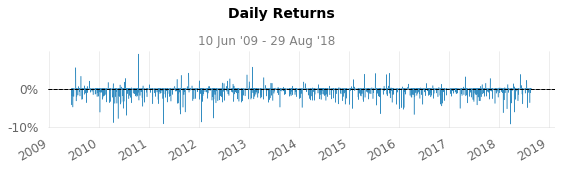

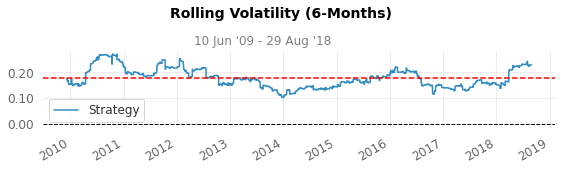

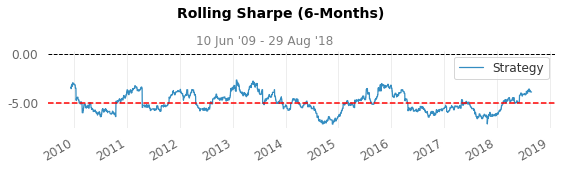

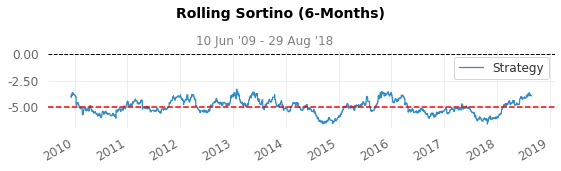

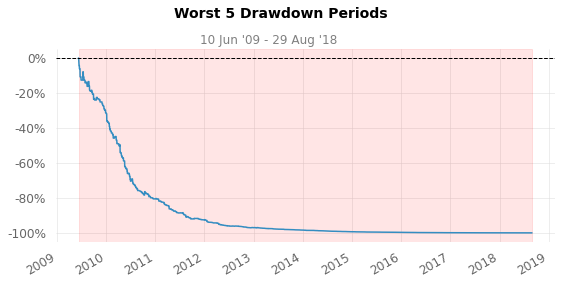

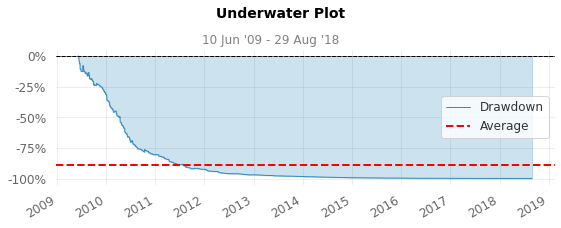

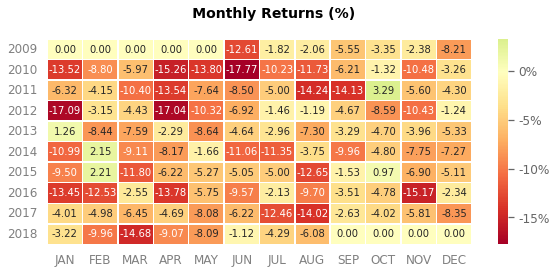

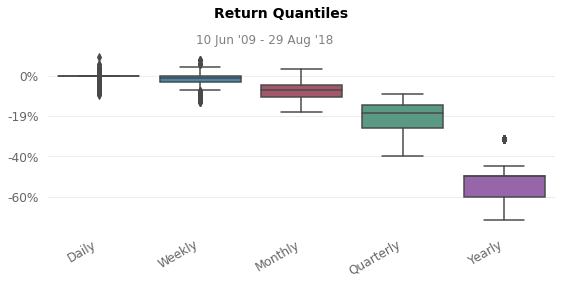

In [ ]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')